<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module6/iris_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Iris Dataset**

* The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

* These measures are used to create a linear discriminant model to classify the species.

* The dataset is often used in data mining, classification and clustering examples and to test algorithms.

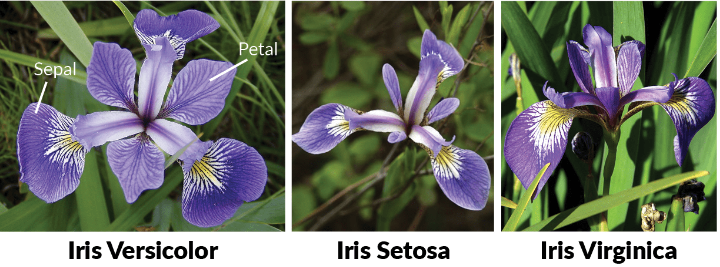

In [26]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt


# Load the data set which contains two parts:
#   -- iris.data    ==> 150x4 matrix of input features
#   -- iris.target  ==> 150x1 matrix of class labels
iris = load_iris()

print(iris.feature_names)
print(iris.target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## **Examining the dataset**

In [21]:
# Extract the input matrix of size 150x2
X = iris.data[:, (2, 3)]  # petal length (PL), petal width (PW)

# Create the expected output vector of size 150x1
# Iris target values of 0, 1, 2 = Setosa, Virginica, Versicolor
y = (iris.target == 0).astype(int)  # Binarized output: Iris setosa vs. Other

y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# Let's examine the first 10 training data points -- rows 0-9 and the 4 features in cols 0,1,2,3

iris.data[0:9, 0:4]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])

In [19]:
# What is the dimensionality of X?

print(X.shape)


(150, 2)


In [20]:
# Let's look at the target classes Setosa, Versicolor, Virginca that are
# coded as 0, 1, and 2, respectively

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
# Binarized target y ==> Setosa vs. non-Setosa

print(y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


# **Train the Perceptron  on the Dataset**

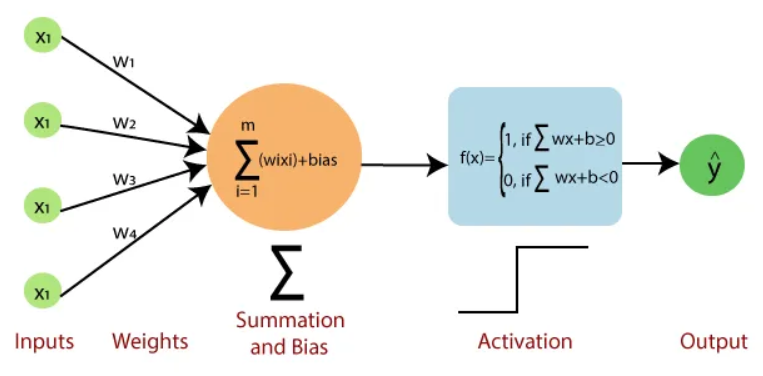

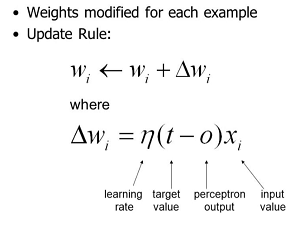

In [28]:
# Create the perceptron classifier model
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

# max_iter defines the number of times the model is trained on the entire dataset (epochs), and eta0 is the learning parameter.
per_clf = Perceptron(max_iter=1000, eta0=0.1)

# Train the model
per_clf.fit(X, y)

# Test the model to see how it classifies a test case
y_pred = per_clf.predict([[2, 0.5]])

print(y_pred)


[0]


## **The Trained Models' Parameters and Accuracy**

In [29]:
# Retrieve the weights assigned to the features (inputs)

print(per_clf.coef_)


[[-0.07 -0.12]]


In [30]:
# Retrieve the bias in the decision function

print(per_clf.intercept_)


[0.2]


In [31]:
# What is the trained model's accuracy score (classification accuracy) on the entire training set X?

print(per_clf.score(X, y))


1.0


## **The Trained Perceptron's Decision Function**

* #    (-0.07 * PL) + (-0.12 * PW) + 0.2 = 0



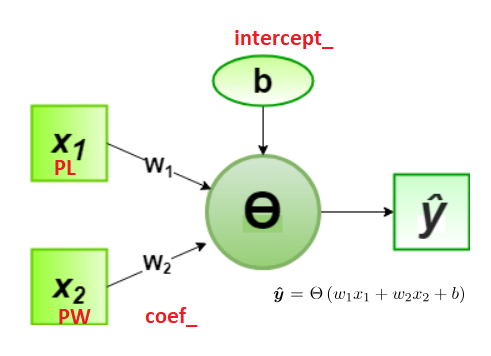

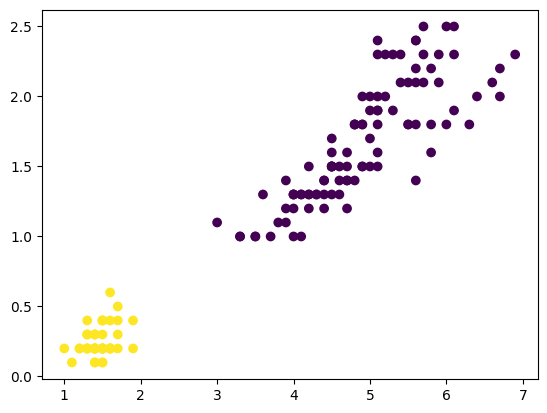

In [32]:
# Let's draw the scatter plot of the training data points

plt.scatter(X[:, 0], X[:, 1], c=y)



In [33]:
# Find out min and max values for the two features PL & PW

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()


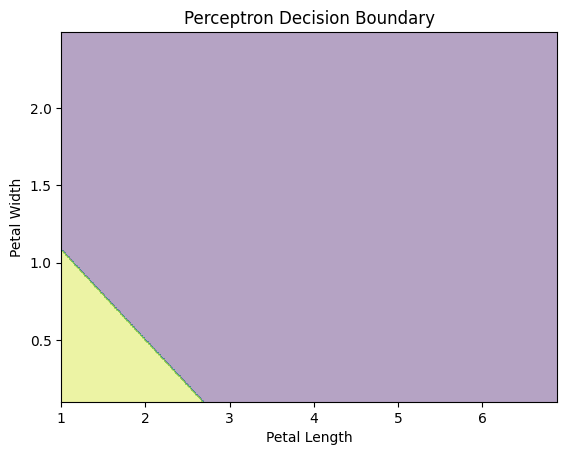

In [34]:
# Draw the decision boundary and label the axes

# Meshgrid turns NumPy arrays into  matrices or grids of values
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Evaluate and plot the entire mesh
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# The reshape() function in Python is used to change the shape of an array
# Here, the reshaping is necessay for contour plotting
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.title('Perceptron Decision Boundary')

plt.show()